In [24]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
# %load_ext jupyternotify
%reload_ext jupyternotify
from task2_utils_niklas import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score,r2_score
from matplotlib import pyplot
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from scipy.special import expit as sigmoid
from sklearn.metrics import mean_squared_error
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import seaborn as sns

<IPython.core.display.Javascript object>

In [25]:
train_features = pd.read_csv("./handout/train_features.csv",index_col='pid')
trains_labels = pd.read_csv("./handout/train_labels.csv",index_col='pid')
test_features = pd.read_csv("./handout/test_features.csv",index_col='pid')

In [26]:
#print("number of unique pid is {}".format(np.size(train_features.pid.unique())))
print("train_features has {} rows and {} columns".format(train_features.shape[0],train_features.shape[1]))
train_features.describe()

train_features has 227940 rows and 36 columns


,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
count,227940.000000,227940.000000,9783.000000,10299.000000,20105.000000,10756.000000,81115.000000,22295.000000,12559.00000,19887.000000,187785.000000,2493.000000,11590.000000,19083.000000,17792.000000,21043.000000,5761.000000,26602.000000,18035.000000,13014.000000,47036.000000,195889.000000,17523.000000,28393.000000,152418.000000,17830.000000,5708.000000,195192.000000,719.000000,13917.000000,27297.000000,200128.000000,5326.000000,3776.000000,191650.000000,25046.000000
mean,7.014399,62.073809,32.883114,40.091310,23.192664,2.859716,36.852136,10.628208,23.48810,-1.239284,18.154043,262.496911,3.612519,11.738649,1.495777,41.115696,193.444888,0.701666,204.666426,93.010527,142.169407,82.117276,2.004149,4.152729,64.014711,7.161149,97.796163,97.663449,1.390723,106.260185,31.283090,84.522371,1.640941,7.269240,122.369877,7.367231
std,4.716103,16.451854,7.802065,26.034961,20.024289,2.428368,0.875152,2.074859,4.40378,4.192677,5.037031,133.020910,1.384462,10.088872,1.898112,8.929873,682.836708,24.522126,104.156406,10.887271,56.894530,16.471871,0.437286,0.670168,13.920097,2.812067,122.773379,2.786186,2.792722,5.916082,5.770425,17.643437,3.244145,25.172442,23.273834,0.074384
min,1.000000,15.000000,10.000000,12.500000,1.000000,0.200000,21.000000,3.300000,0.00000,-29.000000,1.000000,34.000000,0.200000,0.100000,0.100000,10.000000,5.000000,0.000000,2.000000,24.000000,15.000000,20.000000,0.500000,1.300000,20.000000,1.000000,12.000000,20.000000,0.010000,66.000000,9.400000,23.000000,0.100000,0.010000,21.000000,6.820000
25%,4.000000,52.000000,28.500000,27.800000,12.000000,1.400000,36.000000,9.200000,21.00000,-3.000000,15.000000,177.000000,2.800000,7.600000,0.700000,36.000000,21.000000,0.400000,137.000000,95.000000,108.000000,71.000000,1.700000,3.700000,54.250000,7.300000,53.000000,96.000000,0.100000,103.000000,27.300000,72.000000,0.500000,0.030000,105.000000,7.330000
50%,7.000000,64.000000,33.000000,32.200000,17.000000,2.100000,37.000000,10.500000,23.90000,-1.000000,18.000000,233.000000,3.400000,10.400000,0.900000,40.000000,36.000000,0.500000,189.000000,97.000000,130.000000,80.000000,2.000000,4.100000,62.000000,8.200000,72.000000,98.000000,0.300000,107.000000,30.900000,83.000000,0.800000,0.150000,119.000000,7.370000
75%,10.000000,74.000000,38.000000,40.600000,27.000000,3.400000,37.000000,12.000000,26.00000,0.000000,21.000000,316.000000,4.200000,14.000000,1.380000,45.000000,84.000000,0.600000,251.000000,98.000000,160.000000,91.000000,2.200000,4.500000,72.000000,8.700000,104.000000,100.000000,1.210000,110.000000,35.000000,95.000000,1.400000,2.050000,137.000000,7.410000
max,315.000000,100.000000,100.000000,250.000000,268.000000,31.000000,42.000000,23.800000,50.00000,100.000000,97.000000,1179.000000,16.400000,440.000000,41.900000,100.000000,9961.000000,4000.000000,2322.000000,100.000000,952.000000,300.000000,9.600000,10.750000,298.000000,20.600000,3833.000000,100.000000,21.200000,141.000000,63.400000,191.000000,46.500000,440.000000,287.000000,7.780000


In [27]:
train_features.isna().sum().to_frame().transpose()

,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,0,0,218157,217641,207835,217184,146825,205645,215381,208053,40155,225447,216350,208857,210148,206897,222179,201338,209905,214926,180904,32051,210417,199547,75522,210110,222232,32748,227221,214023,200643,27812,222614,224164,36290,202894


As it can be seen, there are a lot of NA in the data which needs to be handled

In [28]:
# print("number of unique pid is {}".format(np.size(trains_labels.pid.unique())))
print("trains_labels has {} rows and {} columns".format(trains_labels.shape[0],trains_labels.shape[1]))
trains_labels.describe()

trains_labels has 18995 rows and 15 columns


,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
count,18995.000000,18995.000000,18995.000000,18995.00000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000
mean,0.268281,0.073704,0.239747,0.23622,0.240590,0.200211,0.099763,0.233693,0.033904,0.066017,0.057278,18.795960,82.511171,96.947311,84.119716
std,0.443076,0.261295,0.426940,0.42477,0.427453,0.400168,0.299692,0.423190,0.180986,0.248319,0.232380,3.511241,12.745110,2.110957,14.718396
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,26.000000,27.000000,30.200000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.550000,73.200000,95.900000,73.700000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,81.000000,97.100000,83.400000
75%,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.600000,90.200000,98.300000,93.600000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.100000,147.100000,100.000000,155.600000


In [29]:
# print("number of unique pid is {}".format(np.size(test_features.pid.unique())))
print("test_features has {} rows and {} columns".format(test_features.shape[0],test_features.shape[1]))
test_features.describe()

test_features has 151968 rows and 36 columns


,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
count,151968.000000,151968.000000,6528.000000,6853.000000,13448.000000,7276.000000,54155.000000,14872.000000,8422.000000,13238.000000,125299.000000,1655.000000,7686.000000,12753.000000,11805.000000,13881.000000,3908.000000,17799.000000,11873.000000,8670.000000,31072.000000,130672.000000,11827.000000,19015.000000,101309.000000,11892.000000,3861.000000,130227.000000,478.00000,9417.000000,18249.000000,133565.000000,3549.000000,2469.000000,128317.000000,16806.000000
mean,7.000553,62.154296,32.560432,39.934071,23.438467,2.743194,36.853698,10.655362,23.494028,-1.129381,18.201614,263.741571,3.612015,11.638304,1.478575,41.122434,251.066658,0.553304,207.103660,92.981430,142.704627,81.858080,2.012246,4.153665,63.708425,7.158564,99.091557,97.668464,1.46046,106.321705,31.373145,84.525235,1.670710,7.410737,122.179033,7.369232
std,4.436079,16.338174,7.656557,25.250865,19.992525,2.288238,0.875930,2.060924,4.268973,4.074558,5.099404,135.765163,1.363589,6.597006,1.833298,8.936093,912.050978,0.215522,105.003544,10.722283,58.320583,16.347929,0.436171,0.677888,13.790649,2.816791,111.488116,2.781903,2.83072,5.913163,5.759315,17.570528,3.297235,24.346532,23.057958,0.072396
min,1.000000,16.000000,10.000000,18.100000,1.000000,0.300000,27.000000,2.300000,0.000000,-32.000000,1.000000,35.000000,0.300000,0.100000,0.100000,14.000000,5.000000,0.000000,5.000000,27.000000,14.000000,20.000000,0.200000,1.400000,20.000000,1.000000,11.000000,22.000000,0.01000,74.000000,9.100000,21.000000,0.100000,0.010000,28.000000,6.620000
25%,4.000000,52.000000,28.000000,27.600000,12.000000,1.310000,36.000000,9.200000,21.000000,-3.000000,15.000000,174.000000,2.800000,7.700000,0.700000,36.000000,21.000000,0.400000,138.000000,95.000000,108.000000,70.000000,1.700000,3.700000,54.000000,7.300000,53.000000,96.000000,0.12000,103.000000,27.400000,72.000000,0.500000,0.030000,105.000000,7.330000
50%,7.000000,64.000000,33.000000,32.000000,17.000000,2.020000,37.000000,10.500000,24.000000,-1.000000,18.000000,228.000000,3.400000,10.500000,0.920000,40.000000,36.000000,0.500000,193.000000,97.000000,130.500000,80.000000,2.000000,4.100000,62.000000,8.200000,72.000000,98.000000,0.30000,107.000000,31.000000,83.000000,0.800000,0.210000,119.000000,7.370000
75%,10.000000,74.000000,37.000000,40.600000,27.000000,3.300000,37.000000,12.000000,26.000000,0.500000,21.000000,313.000000,4.200000,14.200000,1.380000,45.000000,88.000000,0.600000,256.000000,98.000000,160.000000,91.000000,2.200000,4.500000,71.500000,8.700000,103.000000,100.000000,1.30000,110.000000,35.000000,95.000000,1.400000,2.530000,136.000000,7.410000
max,293.000000,100.000000,100.000000,249.900000,205.000000,23.300000,42.000000,23.800000,49.000000,36.000000,98.000000,976.000000,16.500000,170.300000,25.000000,100.000000,9840.000000,10.000000,1667.000000,100.000000,871.000000,291.000000,9.100000,10.600000,240.000000,22.200000,2121.000000,100.000000,21.00000,145.000000,71.700000,184.000000,46.400000,271.600000,281.000000,7.690000


The first preprocessing step is to make sure the time feature is always between 1-12

In [30]:
features_train = train_features.copy(deep=True)
features_train['Time'] = np.tile(np.arange(1,13),18995)
features_test = test_features.copy(deep=True)
features_test['Time'] = np.tile(np.arange(1,13),12664)

To suppress the outliers, we use the sigmoid standardizer

In [31]:
features_train = features_train.apply(lambda col: sigmoid((col - np.mean(col))/np.std(col)))
features_test = features_test.apply(lambda col: sigmoid((col - np.mean(col))/np.std(col)))

This is the main part of the preprocessing, we used the MICE approach. In summary, it fill each NA with the mean of the column, then, fits a linear model for each columns and updates one feature at a time. This process is repeated until all the features are filled and predicted using the linear model

In [32]:
start = time.time()
from fancyimpute import IterativeImputer
imputer = IterativeImputer(max_iter=40, random_state=0,sample_posterior=False)

# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2)

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


features_train.iloc[:, :] = imputer.fit_transform(features_train)
features_test.iloc[:, :] = imputer.fit_transform(features_test)
# features_test.iloc[:, :] = imputer.transform(features_test)

end = time.time()
print('It took the iterative imputer '+str(end-start)+' seconds to impute the data.')
print(features_train.shape)
print(features_test.shape)

%notify

It took the iterative imputer 36.030795097351074 seconds to impute the data.
(227940, 36)
(151968, 36)


<IPython.core.display.Javascript object>

As we have 12 observations for each patient, we need to find a way to represent them in one column. We use the groupby function to extract 4 features per patient: mean, min, max, and std, across the 12 hours

In [33]:
# features_train = features_train.groupby(features_train.index).agg(['mean','median','min', 'max','std','skew'])
# features_test = features_test.groupby(features_test.index).agg(['mean','median','min', 'max','std','skew'])

features_train = features_train.groupby(features_train.index).agg(['mean','min', 'max','std'])
features_test = features_test.groupby(features_test.index).agg(['mean','min', 'max','std'])

%notify

<IPython.core.display.Javascript object>

In [34]:
features_train

Time                                     Age                              EtCO2                                     PTT                                     BUN                                 Lactate                                    Temp                                     Hgb                                    HCO3                               BaseExcess                                   RRate                               Fibrinogen                               Phosphate                                     WBC                               Creatinine                                   PaCO2                                     AST                                    FiO2                               Platelets                                    SaO2                                 Glucose                                    ABPm                               Magnesium                               Potassium                                    ABPd                      \
      mean       min       max       std      mean       min       max  std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std       mean       min       max       std      mean       min       max       std       mean       min       max       std      mean       min       max       std      mean       min       max       std       mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max       std      mean       min       max   
pid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1      0.5  0.168926  0.831074  0.229294  0.153628  0.153628  0.153628  0.0  0.464818  0.272579  0.546370  0.095743  0.440218  0.409184  0.458961  0.013205  0.412475  0.363786  0.452410  0.031575  0.447518  0.376569  0.518252  0.037462  0.501891  0.274142  0.787785  0.156063  0.354808  0.205992  0.474178  0.120035  0.521618  0.454448  0.638860  0.061118   0.525546  0.454763  0.573364  0.043427  0.445878  0.227626  0.492355  0.081339   0.485682  0.485335  0.485950  0.000143  0.482964  0.376412  0.671128  0.073712  0.440520  0.332326  0.511461  0.061927   0.471507  0.371770  0.512788  0.038164  0.494893  0.383303  0.607064  0.064884  0.477268  0.470184  0.487141  0.005355  0.497756  0.496859  0.499804  0.000881  0.460153  0.356159  0.523087  0.046816  0.523161  0.508163  0.538029  0.010930  0.458605  0.326689  0.548305  0.055661  0.310796  0.145828  0.528544  0.107002  0.453755  0.137169  0.554582  0.114038  0.473132  0.371371  0.515170  0.037873  0.280900  0.142213  0.472823   
2      0.5  0.168926  0.831074  0.2292

For the time, and age features it does not make sense to extract the 4 aforementioned features, so they are dropped

In [35]:
# features_train.columns = features_train.columns.droplevel()
cols = [1,2,3,4,5,6,8,9,10,11,12]
features_train.drop(features_train.columns[cols],inplace=True,axis=1)
print(features_train.shape)
features_test.drop(features_test.columns[cols],inplace=True,axis=1)
print(features_test.shape)

(18995, 133)
(12664, 133)


In [36]:
temp_train = features_train
temp_test = features_test

# features_train = temp_train
# features_test = temp_test

Also, there might be features that are highly correlated with each other, we only keep one of them

In [37]:
corr_matrix = features_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)

features_train.drop(features_train[to_drop], axis=1,inplace=True)
features_test.drop(features_test[to_drop], axis=1,inplace=True)

print(features_train.shape)
print(features_test.shape)

%notify

[('PTT', 'std'), ('BUN', 'std'), ('BaseExcess', 'mean'), ('WBC', 'std'), ('Creatinine', 'max'), ('Creatinine', 'std'), ('FiO2', 'max'), ('FiO2', 'std'), ('SaO2', 'std'), ('Glucose', 'std'), ('ABPm', 'min'), ('ABPm', 'max'), ('ABPd', 'mean'), ('ABPd', 'min'), ('ABPd', 'max'), ('ABPd', 'std'), ('Alkalinephos', 'max'), ('Alkalinephos', 'std'), ('SpO2', 'min'), ('SpO2', 'std'), ('Bilirubin_direct', 'max'), ('Bilirubin_direct', 'std'), ('Hct', 'mean'), ('Hct', 'min'), ('Hct', 'max'), ('Hct', 'std'), ('Heartrate', 'min'), ('Heartrate', 'max'), ('Bilirubin_total', 'max'), ('Bilirubin_total', 'std'), ('TroponinI', 'max'), ('TroponinI', 'std'), ('ABPs', 'mean'), ('ABPs', 'min'), ('ABPs', 'max')]
(18995, 98)
(12664, 98)


<IPython.core.display.Javascript object>

In [38]:
# to skip concat, uncomment these
fullTrain_concat = features_train
fullTest_concat = features_test

start = time.time()

# fullTrain_concat = concat_pid_rows(features_train)
# fullTest_concat = concat_pid_rows(features_test)

# ## for skipping PCA, uncomment these:
fullTrain = fullTrain_concat
fullTest = fullTest_concat

end = time.time()
print('It took the iterative imputer '+str(end-start)+' seconds to concat the data.')
%notify

It took the iterative imputer 5.412101745605469e-05 seconds to concat the data.


<IPython.core.display.Javascript object>

In our attempts, the PCA did not improve the performance a lot, rather it decreased it. Our guess is it is because of the highly correlated features

In [39]:
# pca = PCA(n_components = 0.75,random_state=0)

# fullTrain_pca = pca.fit_transform(fullTrain_concat)
# fullTrain = pd.DataFrame(fullTrain_pca,fullTrain_concat.index)

# fullTest_pca = pca.transform(fullTest_concat)
# fullTest = pd.DataFrame(fullTest_pca,fullTest_concat.index)
# %notify

In [40]:
fullTrain.to_pickle('./pickled_data/fullTrain_Farzam')
fullTest.to_pickle('./pickled_data/fullTest_Farzam')

# fullTrain = pd.read_pickle('./pickled_data/fullTrain_Farzam')
# fullTest = pd.read_pickle('./pickled_data/fullTest_Farzam')

# fullTrain = pd.read_pickle('./pickled_data/features_train_scaled_impiter_concat_pca.pkl')
# fullTest = pd.read_pickle('./pickled_data/features_test_scaled_impiter_concat_pca.pkl')

# fullTrain = pd.read_pickle('./pickled_data/features_train_scaled_impknn_concat_pca')
# fullTest = pd.read_pickle('./pickled_data/features_test_scaled_impknn_concat_pca')

In [41]:
fullTrain.sort_index(ascending=True,inplace=True)
trains_labels.sort_index(ascending=True,inplace=True)
predictions = pd.DataFrame(index=fullTest.index)

In [42]:
labels_task1 = ['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total', 'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2', 'LABEL_Bilirubin_direct', 'LABEL_EtCO2']
labels_task2 = ['LABEL_Sepsis']
labels_task3 = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']

# Subtask 1

For this subtask, we use logistic regression, and cross validate different parameters, with roc_auc for scoring.
We also utilized random over sampler to handle the class imbalance.

In [46]:
# runs faster
predictions_1 = pd.DataFrame(columns=labels_task1)
n_estimators = 10
X_test_ = fullTest

for i in labels_task1:
    
        print(i)
        X = fullTrain.iloc[:,:]
        y = trains_labels.loc[:,i]
        X, y = RandomUnderSampler(random_state=0).fit_resample(X, y)

        params = {'C':[2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**1,2**2,2**3,2**4,2**5,2**7,2**9,2**11]}
        est = LogisticRegression(solver='lbfgs',max_iter=5000,verbose=0,fit_intercept=True,intercept_scaling=1,
                         multi_class='ovr')

        clf = GridSearchCV(est,params,cv=5,n_jobs=-1,verbose=1,scoring='roc_auc')
        clf.fit(X,y)
        predictions_1.loc[:,i] = sigmoid(clf.decision_function(X_test_))
        print(clf.best_estimator_)
        print("train ROC score: ",roc_auc_score(y, sigmoid(clf.decision_function(X))))
        
        
%notify

LABEL_BaseExcess
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   36.7s finished


LogisticRegression(C=2048, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.8814621511870055
LABEL_Fibrinogen
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    6.9s finished


LogisticRegression(C=32, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.8019448979591837
LABEL_AST
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   33.3s finished


LogisticRegression(C=2048, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.7262586916307487
LABEL_Alkalinephos
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   31.2s finished


LogisticRegression(C=2048, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.7339883751037901
LABEL_Bilirubin_total
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   32.9s finished


LogisticRegression(C=2048, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.7315576325479175
LABEL_Lactate
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   20.3s finished


LogisticRegression(C=16, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.7833829514031473
LABEL_TroponinI
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   11.6s finished


LogisticRegression(C=2048, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.8478309117870245
LABEL_SaO2
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   34.0s finished


LogisticRegression(C=8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.7985582744358573
LABEL_Bilirubin_direct
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.5s finished


LogisticRegression(C=2048, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.8178769144708923
LABEL_EtCO2
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    5.5s finished


LogisticRegression(C=128, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.8997329756899135


<IPython.core.display.Javascript object>

In [718]:
# predictions_1.to_pickle("./pickled_data/task1CrossValidated")

# predictions_1 = pd.read_pickle("./pickled_data/task1CrossValidated")
# predictions_1.shape

## Small scale tests

In [47]:
X = fullTrain.iloc[:,:]
y = trains_labels.iloc[:,0]

X, y = SMOTE().fit_resample(X, y)
# X, y = ADASYN().fit_resample(X, y)
# X, y = BorderlineSMOTE().fit_resample(X, y)
# smote_nc = SMOTENC(categorical_features=[0, 1], random_state=0)
# X, y = smote_nc.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [48]:
n_estimators = 10
clf_linear = OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf',C=2**5,degree=5,gamma='scale',shrinking=True,
                                    probability=True,class_weight='balanced'), 
                                    max_samples=1.0 / n_estimators, n_estimators=n_estimators,n_jobs=-1,bootstrap = False))
clf_linear.fit(X_train, y_train)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=SVC(C=32,
                                                                   break_ties=False,
                                                                   cache_size=200,
                                                                   class_weight='balanced',
                                                                   coef0=0.0,
                                                                   decision_function_shape='ovr',
                                                                   degree=5,
                                                                   gamma='scale',
                                                                   kernel='rbf',
                                                                   max_iter=-1,
                                                                   probability=True,
                                                                   random_state=None,


In [49]:
print("train ROC score: ",roc_auc_score(y_train, pd.DataFrame(clf_linear.predict_proba(X_train)).iloc[:,1]))
print("test ROC score: ",roc_auc_score(y_test, pd.DataFrame(clf_linear.predict_proba(X_test)).iloc[:,1]))
print("test ROC score (with decision function): ",roc_auc_score(y_test, sigmoid(clf_linear.decision_function(X_test))))

train ROC score:  0.9060435927100545
test ROC score:  0.8986237271184149
test ROC score (with decision function):  0.8984396960458944


## Logistic Regression

In [50]:
grid = {"C":[2**-2,2**-1, 2**1, 2**3, 2**5, 2**7, 2**9, 2**11,2**13, 2**15,2**17]}
clf = LogisticRegression(class_weight='balanced',max_iter=1000)
model = GridSearchCV(clf,grid,cv=5,n_jobs=-1)
model.fit(X,y)
print(' > Best estimator: {}'.format(model.best_estimator_))

print("train ROC score: ",roc_auc_score(y_train, sigmoid(model.decision_function(X_train))))
print("test ROC score: ",roc_auc_score(y_test, sigmoid(model.decision_function(X_test))))

 > Best estimator: LogisticRegression(C=128, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.8778488278119425
test ROC score:  0.8781711711571802


/Users/farzamf/Anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#  subtask 2

(18995, 98)
(18995, 2)


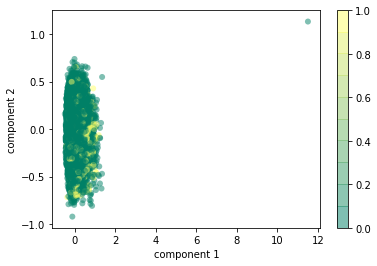

In [51]:
from sklearn.datasets import load_digits
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(fullTrain_concat)
print(fullTrain_concat.shape)
print(projected.shape)
plt.scatter(projected[:, 0], projected[:, 1],
            c=trains_labels.loc[:,'LABEL_Sepsis'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('summer', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [52]:
predictions_2 = pd.DataFrame(columns=labels_task2)

X = fullTrain.iloc[:,:]
y = trains_labels.loc[:,'LABEL_Sepsis']

X, testX, y, testY = train_test_split(X, y,stratify=y,test_size=0.2,random_state=0)

X, y = RandomUnderSampler(random_state=0).fit_resample(X, y)
# X, y = NearMiss(version=1).fit_resample(X, y)
# X, y = SMOTE().fit_resample(X, y)
X_test_ = fullTest

params = {'C':[2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**1,2**2,2**3,2**4,2**5]}
est = LogisticRegression(solver='lbfgs',max_iter=2000,verbose=0,fit_intercept=True,intercept_scaling=1,
                         multi_class='ovr')

clf_sepsis = GridSearchCV(est,params,cv=3,n_jobs=-1,verbose=1,scoring='roc_auc')
clf_sepsis.fit(X, y)

predictions_2['LABEL_Sepsis'] = sigmoid(clf_sepsis.decision_function(X_test_))

print('Best estimator for sepsis: {}'.format(clf_sepsis.best_estimator_))
print("train ROC score: ",roc_auc_score(y, sigmoid(clf_sepsis.decision_function(X))))
print("test ROC score: ",roc_auc_score(testY, sigmoid(clf_sepsis.decision_function(testX))))

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best estimator for sepsis: LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train ROC score:  0.7213581714889682
test ROC score:  0.711110370994725


[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished


### ANN approach

In [681]:
def auc( y_true, y_pred ) :
    score = tf.py_function( lambda y_true, y_pred : roc_auc_score( y_true, y_pred, average='macro', sample_weight=None).astype('float32'),
                        [y_true, y_pred],
                        'float32',
#                         stateful=False,
                        name='sklearnAUC' )
    return score

predictions_2 = pd.DataFrame(columns=labels_task2)
X = fullTrain.iloc[:,:]
y = trains_labels.loc[:,'LABEL_Sepsis']
X_test_ = fullTest

X, testX, y, testY = train_test_split(X, y,stratify=y,test_size=0.15,random_state=0)

# X, y = RandomOverSampler(random_state=0).fit_resample(X, y)
X, y = RandomUnderSampler(random_state=0).fit_resample(X, y)
# X, y = SMOTE().fit_resample(X, y)

%notify

<IPython.core.display.Javascript object>

In [699]:
from keras.constraints import unit_norm

model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-3,l2=1e-3)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-1,l2=1e-5)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5,l2=1e-1)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

usualCallback = EarlyStopping()
overfitCallback = EarlyStopping(monitor='val_auc', mode='max', verbose=1, patience=100)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc])

%notify

<IPython.core.display.Javascript object>

In [700]:
# from imblearn.keras import BalancedBatchGenerator
# from imblearn.under_sampling import NearMiss
# from imblearn.combine import SMOTEENN
# from imblearn.under_sampling import AllKNN

# training_generator = BalancedBatchGenerator(X, to_categorical(y), sampler=NearMiss(), batch_size=128, random_state=0)
# # validation_generator = BalancedBatchGenerator(testX, to_categorical(testY), sampler=NearMiss(), batch_size=128, random_state=0)

# %notify

In [701]:
# history = model.fit_generator(generator=training_generator,
#                               epochs=100,callbacks=[overfitCallback],validation_data=(testX, to_categorical(testY)))

history = model.fit(X, to_categorical(y),batch_size=X.shape[0],validation_data=(testX, to_categorical(testY)),
                    epochs=1000,callbacks=[overfitCallback],class_weight='balanced')

%notify

Train on 1850 samples, validate on 2850 samples
Epoch 1/1000
1850/1850 [==============================] - 0s 253us/step - loss: 383.4000 - auc: 0.5055 - val_loss: 376.2031 - val_auc: 0.6129
Epoch 2/1000
1850/1850 [==============================] - 0s 24us/step - loss: 376.1877 - auc: 0.5096 - val_loss: 369.0631 - val_auc: 0.6196
Epoch 3/1000
1850/1850 [==============================] - 0s 23us/step - loss: 369.0468 - auc: 0.4919 - val_loss: 361.9986 - val_auc: 0.6231
Epoch 4/1000
1850/1850 [==============================] - 0s 24us/step - loss: 361.9811 - auc: 0.4935 - val_loss: 355.0224 - val_auc: 0.6239
Epoch 5/1000
1850/1850 [==============================] - 0s 23us/step - loss: 355.0033 - auc: 0.5120 - val_loss: 348.1189 - val_auc: 0.6159
Epoch 6/1000
1850/1850 [==============================] - 0s 23us/step - loss: 348.1012 - auc: 0.5268 - val_loss: 341.2938 - val_auc: 0.6250
Epoch 7/1000
1850/1850 [==============================] - 0s 24us/step - loss: 341.2814 - auc: 0.5097 - v

Epoch 59/1000
1850/1850 [==============================] - 0s 24us/step - loss: 84.6178 - auc: 0.6761 - val_loss: 81.4638 - val_auc: 0.6957
Epoch 60/1000
1850/1850 [==============================] - 0s 23us/step - loss: 81.4667 - auc: 0.6738 - val_loss: 78.3512 - val_auc: 0.6960
Epoch 61/1000
1850/1850 [==============================] - 0s 23us/step - loss: 78.3776 - auc: 0.6754 - val_loss: 75.3821 - val_auc: 0.6966
Epoch 62/1000
1850/1850 [==============================] - 0s 23us/step - loss: 75.3443 - auc: 0.6785 - val_loss: 72.3975 - val_auc: 0.6970
Epoch 63/1000
1850/1850 [==============================] - 0s 25us/step - loss: 72.3785 - auc: 0.6819 - val_loss: 69.4551 - val_auc: 0.6971
Epoch 64/1000
1850/1850 [==============================] - 0s 25us/step - loss: 69.4960 - auc: 0.6778 - val_loss: 66.6859 - val_auc: 0.6979
Epoch 65/1000
1850/1850 [==============================] - 0s 25us/step - loss: 66.6675 - auc: 0.6805 - val_loss: 63.9419 - val_auc: 0.6982
Epoch 66/1000
1850/1

Epoch 118/1000
1850/1850 [==============================] - 0s 24us/step - loss: 3.2840 - auc: 0.6313 - val_loss: 3.1145 - val_auc: 0.7031
Epoch 119/1000
1850/1850 [==============================] - 0s 24us/step - loss: 3.1167 - auc: 0.6119 - val_loss: 2.9674 - val_auc: 0.7032
Epoch 120/1000
1850/1850 [==============================] - 0s 26us/step - loss: 2.9631 - auc: 0.6415 - val_loss: 2.8359 - val_auc: 0.7030
Epoch 121/1000
1850/1850 [==============================] - 0s 27us/step - loss: 2.8398 - auc: 0.6450 - val_loss: 2.7319 - val_auc: 0.7031
Epoch 122/1000
1850/1850 [==============================] - 0s 24us/step - loss: 2.7417 - auc: 0.6347 - val_loss: 2.6607 - val_auc: 0.7031
Epoch 123/1000
1850/1850 [==============================] - 0s 25us/step - loss: 2.6722 - auc: 0.6420 - val_loss: 2.6309 - val_auc: 0.7031
Epoch 124/1000
1850/1850 [==============================] - 0s 23us/step - loss: 2.6230 - auc: 0.6542 - val_loss: 2.5890 - val_auc: 0.7031
Epoch 125/1000
1850/1850 [=

Epoch 177/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.5565 - auc: 0.6547 - val_loss: 1.5539 - val_auc: 0.7044
Epoch 178/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.5511 - auc: 0.6576 - val_loss: 1.5075 - val_auc: 0.7045
Epoch 179/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.5466 - auc: 0.6612 - val_loss: 1.6155 - val_auc: 0.7044
Epoch 180/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.5483 - auc: 0.6686 - val_loss: 1.4437 - val_auc: 0.7046
Epoch 181/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.5570 - auc: 0.6553 - val_loss: 1.6643 - val_auc: 0.7045
Epoch 182/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.5488 - auc: 0.6684 - val_loss: 1.4227 - val_auc: 0.7046
Epoch 183/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.5508 - auc: 0.6576 - val_loss: 1.6159 - val_auc: 0.7047
Epoch 184/1000
1850/1850 [=

Epoch 236/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.5030 - auc: 0.6766 - val_loss: 1.5784 - val_auc: 0.7066
Epoch 237/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.5045 - auc: 0.6724 - val_loss: 1.4370 - val_auc: 0.7068
Epoch 238/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.5010 - auc: 0.6761 - val_loss: 1.5339 - val_auc: 0.7068
Epoch 239/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4998 - auc: 0.6764 - val_loss: 1.4707 - val_auc: 0.7070
Epoch 240/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.5031 - auc: 0.6786 - val_loss: 1.5015 - val_auc: 0.7070
Epoch 241/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.5075 - auc: 0.6740 - val_loss: 1.5263 - val_auc: 0.7069
Epoch 242/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.5003 - auc: 0.6720 - val_loss: 1.4495 - val_auc: 0.7070
Epoch 243/1000
1850/1850 [=

Epoch 295/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4884 - auc: 0.6782 - val_loss: 1.5416 - val_auc: 0.7087
Epoch 296/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4952 - auc: 0.6722 - val_loss: 1.4679 - val_auc: 0.7087
Epoch 297/1000
1850/1850 [==============================] - 0s 22us/step - loss: 1.4930 - auc: 0.6685 - val_loss: 1.4268 - val_auc: 0.7088
Epoch 298/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4837 - auc: 0.6792 - val_loss: 1.5380 - val_auc: 0.7085
Epoch 299/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4831 - auc: 0.6783 - val_loss: 1.4927 - val_auc: 0.7085
Epoch 300/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4805 - auc: 0.6820 - val_loss: 1.4223 - val_auc: 0.7086
Epoch 301/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4883 - auc: 0.6742 - val_loss: 1.5299 - val_auc: 0.7085
Epoch 302/1000
1850/1850 [=

Epoch 354/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4896 - auc: 0.6678 - val_loss: 1.6373 - val_auc: 0.7105
Epoch 355/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4928 - auc: 0.6809 - val_loss: 1.5345 - val_auc: 0.7105
Epoch 356/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4819 - auc: 0.6799 - val_loss: 1.3537 - val_auc: 0.7107
Epoch 357/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4965 - auc: 0.6781 - val_loss: 1.5284 - val_auc: 0.7108
Epoch 358/1000
1850/1850 [==============================] - 0s 22us/step - loss: 1.4808 - auc: 0.6767 - val_loss: 1.5531 - val_auc: 0.7107
Epoch 359/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4793 - auc: 0.6742 - val_loss: 1.4072 - val_auc: 0.7107
Epoch 360/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4737 - auc: 0.6884 - val_loss: 1.4482 - val_auc: 0.7108
Epoch 361/1000
1850/1850 [=

Epoch 413/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4884 - auc: 0.6686 - val_loss: 1.4073 - val_auc: 0.7121
Epoch 414/1000
1850/1850 [==============================] - 0s 22us/step - loss: 1.4700 - auc: 0.6790 - val_loss: 1.4232 - val_auc: 0.7121
Epoch 415/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4743 - auc: 0.6852 - val_loss: 1.5866 - val_auc: 0.7118
Epoch 416/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4846 - auc: 0.6835 - val_loss: 1.4329 - val_auc: 0.7118
Epoch 417/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4758 - auc: 0.6731 - val_loss: 1.5500 - val_auc: 0.7119
Epoch 418/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4642 - auc: 0.6840 - val_loss: 1.4032 - val_auc: 0.7120
Epoch 419/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4660 - auc: 0.6774 - val_loss: 1.5493 - val_auc: 0.7120
Epoch 420/1000
1850/1850 [=

Epoch 472/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.5248 - auc: 0.6860 - val_loss: 1.6006 - val_auc: 0.7137
Epoch 473/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.5042 - auc: 0.6848 - val_loss: 1.3832 - val_auc: 0.7139
Epoch 474/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4987 - auc: 0.6847 - val_loss: 1.4131 - val_auc: 0.7138
Epoch 475/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4957 - auc: 0.6509 - val_loss: 1.6021 - val_auc: 0.6728
Epoch 476/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4985 - auc: 0.6344 - val_loss: 1.4396 - val_auc: 0.7139
Epoch 477/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4691 - auc: 0.6764 - val_loss: 1.4437 - val_auc: 0.7139
Epoch 478/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4762 - auc: 0.6877 - val_loss: 1.5161 - val_auc: 0.7134
Epoch 479/1000
1850/1850 [=

Epoch 531/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4705 - auc: 0.6800 - val_loss: 1.5181 - val_auc: 0.7140
Epoch 532/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4655 - auc: 0.6773 - val_loss: 1.4081 - val_auc: 0.7141
Epoch 533/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4616 - auc: 0.6793 - val_loss: 1.5944 - val_auc: 0.7140
Epoch 534/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.4684 - auc: 0.6948 - val_loss: 1.4937 - val_auc: 0.7141
Epoch 535/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4724 - auc: 0.6944 - val_loss: 1.3857 - val_auc: 0.7142
Epoch 536/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4784 - auc: 0.6911 - val_loss: 1.4774 - val_auc: 0.7020
Epoch 537/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.4657 - auc: 0.6829 - val_loss: 1.5042 - val_auc: 0.7027
Epoch 538/1000
1850/1850 [=

Epoch 590/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4729 - auc: 0.6859 - val_loss: 1.7689 - val_auc: 0.7147
Epoch 591/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.5211 - auc: 0.6888 - val_loss: 1.6451 - val_auc: 0.7148
Epoch 592/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.5135 - auc: 0.6979 - val_loss: 1.4305 - val_auc: 0.7146
Epoch 593/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.5189 - auc: 0.6790 - val_loss: 1.3543 - val_auc: 0.7148
Epoch 594/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.5164 - auc: 0.6773 - val_loss: 1.4805 - val_auc: 0.6890
Epoch 595/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4992 - auc: 0.6508 - val_loss: 1.5380 - val_auc: 0.6768
Epoch 596/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4847 - auc: 0.6467 - val_loss: 1.4483 - val_auc: 0.7147
Epoch 597/1000
1850/1850 [=

Epoch 649/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4792 - auc: 0.6927 - val_loss: 1.4963 - val_auc: 0.7141
Epoch 650/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4904 - auc: 0.6758 - val_loss: 1.4671 - val_auc: 0.7141
Epoch 651/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.5050 - auc: 0.6632 - val_loss: 1.4752 - val_auc: 0.7142
Epoch 652/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4842 - auc: 0.6878 - val_loss: 1.5435 - val_auc: 0.7143
Epoch 653/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4722 - auc: 0.6917 - val_loss: 1.5459 - val_auc: 0.7145
Epoch 654/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4648 - auc: 0.6899 - val_loss: 1.3467 - val_auc: 0.7143
Epoch 655/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4775 - auc: 0.6870 - val_loss: 1.7629 - val_auc: 0.7143
Epoch 656/1000
1850/1850 [=

Epoch 708/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4476 - auc: 0.6939 - val_loss: 1.3403 - val_auc: 0.7149
Epoch 709/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4619 - auc: 0.6891 - val_loss: 1.3988 - val_auc: 0.7149
Epoch 710/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4450 - auc: 0.6947 - val_loss: 1.5735 - val_auc: 0.7150
Epoch 711/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4530 - auc: 0.6890 - val_loss: 1.4627 - val_auc: 0.7152
Epoch 712/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.4334 - auc: 0.6996 - val_loss: 1.3303 - val_auc: 0.7154
Epoch 713/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.4494 - auc: 0.6878 - val_loss: 1.5357 - val_auc: 0.7154
Epoch 714/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.4495 - auc: 0.6954 - val_loss: 1.5589 - val_auc: 0.7153
Epoch 715/1000
1850/1850 [=

Epoch 767/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4457 - auc: 0.6940 - val_loss: 1.3897 - val_auc: 0.7167
Epoch 768/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4419 - auc: 0.6948 - val_loss: 1.5336 - val_auc: 0.7166
Epoch 769/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.4389 - auc: 0.6994 - val_loss: 1.4783 - val_auc: 0.7167
Epoch 770/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.4328 - auc: 0.6952 - val_loss: 1.3320 - val_auc: 0.7168
Epoch 771/1000
1850/1850 [==============================] - 0s 30us/step - loss: 1.4446 - auc: 0.6984 - val_loss: 1.6171 - val_auc: 0.7165
Epoch 772/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4637 - auc: 0.6927 - val_loss: 1.5545 - val_auc: 0.7168
Epoch 773/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4605 - auc: 0.6936 - val_loss: 1.3998 - val_auc: 0.7166
Epoch 774/1000
1850/1850 [=

Epoch 826/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4311 - auc: 0.6923 - val_loss: 1.3884 - val_auc: 0.7171
Epoch 827/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4248 - auc: 0.7042 - val_loss: 1.5005 - val_auc: 0.7173
Epoch 828/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4256 - auc: 0.6973 - val_loss: 1.4274 - val_auc: 0.7173
Epoch 829/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4231 - auc: 0.6953 - val_loss: 1.3886 - val_auc: 0.7173
Epoch 830/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4185 - auc: 0.7077 - val_loss: 1.4881 - val_auc: 0.7171
Epoch 831/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4246 - auc: 0.7068 - val_loss: 1.4005 - val_auc: 0.7171
Epoch 832/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4242 - auc: 0.6999 - val_loss: 1.4792 - val_auc: 0.7170
Epoch 833/1000
1850/1850 [=

Epoch 885/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4384 - auc: 0.6965 - val_loss: 1.5309 - val_auc: 0.7178
Epoch 886/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4407 - auc: 0.7023 - val_loss: 1.3912 - val_auc: 0.7192
Epoch 887/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4421 - auc: 0.6976 - val_loss: 1.4078 - val_auc: 0.7189
Epoch 888/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4446 - auc: 0.7010 - val_loss: 1.5306 - val_auc: 0.7186
Epoch 889/1000
1850/1850 [==============================] - 0s 27us/step - loss: 1.4474 - auc: 0.7004 - val_loss: 1.4188 - val_auc: 0.7185
Epoch 890/1000
1850/1850 [==============================] - 0s 26us/step - loss: 1.4349 - auc: 0.7020 - val_loss: 1.4203 - val_auc: 0.7178
Epoch 891/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4299 - auc: 0.7041 - val_loss: 1.4601 - val_auc: 0.7172
Epoch 892/1000
1850/1850 [=

Epoch 944/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4919 - auc: 0.6997 - val_loss: 1.4656 - val_auc: 0.7187
Epoch 945/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4772 - auc: 0.7086 - val_loss: 1.5047 - val_auc: 0.7190
Epoch 946/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4768 - auc: 0.6900 - val_loss: 1.5250 - val_auc: 0.7196
Epoch 947/1000
1850/1850 [==============================] - 0s 25us/step - loss: 1.4739 - auc: 0.7041 - val_loss: 1.4962 - val_auc: 0.7196
Epoch 948/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4772 - auc: 0.6823 - val_loss: 1.4938 - val_auc: 0.7196
Epoch 949/1000
1850/1850 [==============================] - 0s 23us/step - loss: 1.4664 - auc: 0.7007 - val_loss: 1.4645 - val_auc: 0.7195
Epoch 950/1000
1850/1850 [==============================] - 0s 24us/step - loss: 1.4615 - auc: 0.7005 - val_loss: 1.5126 - val_auc: 0.7195
Epoch 951/1000
1850/1850 [=

<IPython.core.display.Javascript object>

In [702]:
predictions_2['LABEL_Sepsis'] = pd.DataFrame(model.predict_proba(X_test_)).iloc[:,1]
print("train ROC score: ",roc_auc_score(y,pd.DataFrame(model.predict_proba(X)).iloc[:,1]))
print("test ROC score: ",roc_auc_score(testY,pd.DataFrame(model.predict_proba(testX)).iloc[:,1]))

train ROC score:  0.7182317019722425
test ROC score:  0.712841424628009


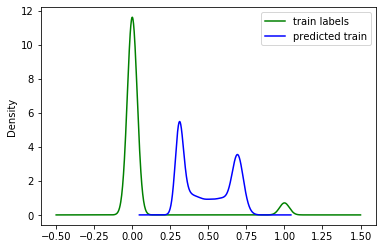

In [703]:
trains_labels['LABEL_Sepsis'].plot.kde(color='green',legend=True,label='train labels')
predictions_2['LABEL_Sepsis'].plot.kde(color='blue',legend=True,label='predicted train')

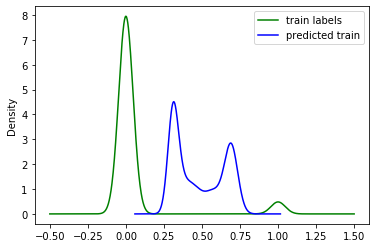

In [704]:
testY.plot.kde(color='green',legend=True,label='train labels')
pd.DataFrame(model.predict_proba(testX)).iloc[:,1].plot.kde(color='blue',legend=True,label='predicted train')

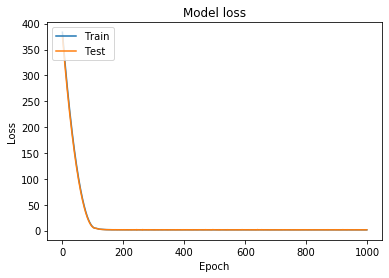

In [705]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

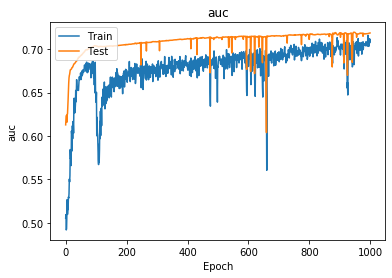

In [706]:
plt.plot(history.history['auc']) 
plt.plot(history.history['val_auc']) 
plt.title('auc') 
plt.ylabel('auc') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [707]:
predictions_2.to_pickle("./pickled_data/task2CrossValidated")

# predictions_2 = pd.read_pickle("./pickled_data/task2CrossValidated")
# predictions_2.shape

#  subtask 3

In [53]:
# from sklearn.metrics import mean_squared_error
# from sklearn.svm import SVR

# labels_task3 = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']
# params = {
#     'C':[2**-1, 2**1, 2**3, 2**5],
#     'kernel':['poly', 'rbf'],
#     'degree':np.arange(2,5)
# } 

# X = fullTrain.iloc[:,:]
# X_test_ = fullTest

# for label in labels_task3:

#     print('>>> Starting to fit test {}'.format(label))
#     clf = GridSearchCV(SVR(cache_size=7000),params,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=1,cv=3)
#     clf.fit(X,trains_labels.loc[:,label])
    
#     print(' > Best estimator: {}'.format(clf.best_estimator_))
#     print(mean_squared_error(trains_labels.loc[:,label], clf.predict(X), squared=False))
    
#     predictions_3[label] = clf.predict(X_test_)

## subtask 3 - ANN approach

In [54]:
# custom R2-score metrics for keras backend
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [55]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-3)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l2=1e-3)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation="linear"))

usualCallback = EarlyStopping()
overfitCallback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

model.compile(loss='mean_squared_error', optimizer='adam',metrics=[r2_keras])

In [56]:
labels_task3 = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_Heartrate']
predictions_3 = pd.DataFrame(columns=labels_task3)
X = fullTrain.iloc[:,:]
X_test_ = fullTest

for label in labels_task3:
    print(label)
    y = trains_labels.loc[:,label]
    history = model.fit(X,y,epochs=2000,callbacks=[overfitCallback],validation_split=0.1)
    predictions_3[label] = pd.DataFrame(model.predict(X_test_))[0]

LABEL_RRate

Train on 17095 samples, validate on 1900 samples
Epoch 1/2000
17095/17095 [==============================] - 1s 63us/step - loss: 29.6013 - r2_keras: -1.3597 - val_loss: 28.0809 - val_r2_keras: -1.0246
Epoch 2/2000
17095/17095 [==============================] - 1s 40us/step - loss: 15.2153 - r2_keras: -0.0695 - val_loss: 27.3230 - val_r2_keras: -1.0265
Epoch 3/2000
17095/17095 [==============================] - 1s 43us/step - loss: 13.0143 - r2_keras: 0.0774 - val_loss: 19.2785 - val_r2_keras: -0.3703
Epoch 4/2000
17095/17095 [==============================] - 1s 41us/step - loss: 11.9071 - r2_keras: 0.1521 - val_loss: 12.2086 - val_r2_keras: 0.2018
Epoch 5/2000
17095/17095 [==============================] - 1s 41us/step - loss: 11.1796 - r2_keras: 0.1849 - val_loss: 9.9630 - val_r2_keras: 0.3379
Epoch 6/2000
17095/17095 [==============================] - 1s 45us/step - loss: 10.5794 - r2_keras: 0.2219 - val_loss: 10.0657 - val_r2_keras: 0.3175
Epoch 7/2000
17095/17095 [==

17095/17095 [==============================] - 1s 42us/step - loss: 7.7867 - r2_keras: 0.3333 - val_loss: 8.2037 - val_r2_keras: 0.3251
Epoch 54/2000
17095/17095 [==============================] - 1s 40us/step - loss: 7.8364 - r2_keras: 0.3272 - val_loss: 8.0458 - val_r2_keras: 0.3462
Epoch 55/2000
17095/17095 [==============================] - 1s 40us/step - loss: 7.7539 - r2_keras: 0.3343 - val_loss: 8.2987 - val_r2_keras: 0.3413
Epoch 56/2000
17095/17095 [==============================] - 1s 46us/step - loss: 7.7395 - r2_keras: 0.3369 - val_loss: 8.2072 - val_r2_keras: 0.3467
Epoch 57/2000
17095/17095 [==============================] - 1s 44us/step - loss: 7.8297 - r2_keras: 0.3320 - val_loss: 8.2850 - val_r2_keras: 0.3393
Epoch 58/2000
17095/17095 [==============================] - 1s 40us/step - loss: 7.8226 - r2_keras: 0.3329 - val_loss: 8.1024 - val_r2_keras: 0.3438
Epoch 59/2000
17095/17095 [==============================] - 1s 40us/step - loss: 7.7456 - r2_keras: 0.3335 - val_

17095/17095 [==============================] - 1s 43us/step - loss: 174.0643 - r2_keras: -0.1189 - val_loss: 194.9113 - val_r2_keras: -0.2434
Epoch 4/2000
17095/17095 [==============================] - 1s 44us/step - loss: 153.8413 - r2_keras: 0.0067 - val_loss: 142.2713 - val_r2_keras: 0.0918
Epoch 5/2000
17095/17095 [==============================] - 1s 40us/step - loss: 122.3731 - r2_keras: 0.2049 - val_loss: 103.3547 - val_r2_keras: 0.3354
Epoch 6/2000
17095/17095 [==============================] - 1s 40us/step - loss: 99.4020 - r2_keras: 0.3524 - val_loss: 111.8128 - val_r2_keras: 0.2784
Epoch 7/2000
17095/17095 [==============================] - 1s 42us/step - loss: 93.0984 - r2_keras: 0.3938 - val_loss: 98.9389 - val_r2_keras: 0.3629
Epoch 8/2000
17095/17095 [==============================] - 1s 43us/step - loss: 88.4205 - r2_keras: 0.4205 - val_loss: 96.1943 - val_r2_keras: 0.3828
Epoch 9/2000
17095/17095 [==============================] - 1s 49us/step - loss: 86.6253 - r2_kera

Epoch 57/2000
17095/17095 [==============================] - 1s 39us/step - loss: 70.6364 - r2_keras: 0.5350 - val_loss: 73.3021 - val_r2_keras: 0.5267
Epoch 58/2000
17095/17095 [==============================] - 1s 40us/step - loss: 70.8217 - r2_keras: 0.5314 - val_loss: 77.4695 - val_r2_keras: 0.5031
Epoch 59/2000
17095/17095 [==============================] - 1s 42us/step - loss: 70.2224 - r2_keras: 0.5357 - val_loss: 74.6066 - val_r2_keras: 0.5208
Epoch 60/2000
17095/17095 [==============================] - 1s 40us/step - loss: 70.7942 - r2_keras: 0.5328 - val_loss: 77.0950 - val_r2_keras: 0.5066
Epoch 61/2000
17095/17095 [==============================] - 1s 40us/step - loss: 70.6198 - r2_keras: 0.5372 - val_loss: 77.3442 - val_r2_keras: 0.5048
Epoch 62/2000
17095/17095 [==============================] - 1s 39us/step - loss: 70.2665 - r2_keras: 0.5392 - val_loss: 80.4927 - val_r2_keras: 0.4870
Epoch 63/2000
17095/17095 [==============================] - 1s 40us/step - loss: 70.185

17095/17095 [==============================] - 1s 40us/step - loss: 101.2912 - r2_keras: 0.5068 - val_loss: 106.9215 - val_r2_keras: 0.4980
Epoch 17/2000
17095/17095 [==============================] - 1s 40us/step - loss: 101.7216 - r2_keras: 0.5038 - val_loss: 114.3530 - val_r2_keras: 0.4682
Epoch 18/2000
17095/17095 [==============================] - 1s 39us/step - loss: 100.4963 - r2_keras: 0.5077 - val_loss: 125.3375 - val_r2_keras: 0.4092
Epoch 19/2000
17095/17095 [==============================] - 1s 39us/step - loss: 100.5124 - r2_keras: 0.5085 - val_loss: 119.4157 - val_r2_keras: 0.4388
Epoch 20/2000
17095/17095 [==============================] - 1s 39us/step - loss: 100.2077 - r2_keras: 0.5110 - val_loss: 128.2968 - val_r2_keras: 0.3962
Epoch 21/2000
17095/17095 [==============================] - 1s 40us/step - loss: 99.8251 - r2_keras: 0.5111 - val_loss: 120.1595 - val_r2_keras: 0.4370
Epoch 22/2000
17095/17095 [==============================] - 1s 40us/step - loss: 98.5025 -

17095/17095 [==============================] - 1s 39us/step - loss: 90.7639 - r2_keras: 0.5544 - val_loss: 132.1042 - val_r2_keras: 0.3804
Epoch 70/2000
17095/17095 [==============================] - 1s 40us/step - loss: 90.9911 - r2_keras: 0.5524 - val_loss: 122.4319 - val_r2_keras: 0.4251
Epoch 71/2000
17095/17095 [==============================] - 1s 41us/step - loss: 91.0436 - r2_keras: 0.5507 - val_loss: 150.3987 - val_r2_keras: 0.2907
Epoch 72/2000
17095/17095 [==============================] - 1s 40us/step - loss: 91.5245 - r2_keras: 0.5487 - val_loss: 128.1566 - val_r2_keras: 0.3977
Epoch 73/2000
17095/17095 [==============================] - 1s 39us/step - loss: 90.1561 - r2_keras: 0.5581 - val_loss: 126.4083 - val_r2_keras: 0.4052
Epoch 74/2000
17095/17095 [==============================] - 1s 39us/step - loss: 90.3772 - r2_keras: 0.5572 - val_loss: 128.5743 - val_r2_keras: 0.4001
Epoch 75/2000
17095/17095 [==============================] - 1s 40us/step - loss: 90.2532 - r2_k

### for LABEL_SpO2

In [57]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-3)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l2=1e-3)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation="linear"))

usualCallback = EarlyStopping()
overfitCallback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

model.compile(loss='mean_squared_error', optimizer='adam',metrics=[r2_keras])

In [58]:
labels_task3 = ['LABEL_SpO2']
# predictions_3 = pd.DataFrame(columns=labels_task3)
X = fullTrain.iloc[:,:]
X_test_ = fullTest

for label in labels_task3:
    print(label)
    y = trains_labels.loc[:,label]
    history = model.fit(X,y,epochs=2000,callbacks=[overfitCallback],validation_split=0.1)
    predictions_3[label] = pd.DataFrame(model.predict(X_test_))[0]

LABEL_SpO2
Train on 17095 samples, validate on 1900 samples
Epoch 1/2000
17095/17095 [==============================] - 1s 69us/step - loss: 467.6428 - r2_keras: -140.9240 - val_loss: 70.1662 - val_r2_keras: -19.3876
Epoch 2/2000
17095/17095 [==============================] - 1s 47us/step - loss: 91.3811 - r2_keras: -25.1358 - val_loss: 245.7966 - val_r2_keras: -79.6089
Epoch 3/2000
17095/17095 [==============================] - 1s 48us/step - loss: 75.4540 - r2_keras: -20.0378 - val_loss: 191.8211 - val_r2_keras: -61.1680
Epoch 4/2000
17095/17095 [==============================] - 1s 48us/step - loss: 68.3298 - r2_keras: -17.5407 - val_loss: 138.9107 - val_r2_keras: -43.1647
Epoch 5/2000
17095/17095 [==============================] - 1s 53us/step - loss: 59.9676 - r2_keras: -15.1388 - val_loss: 147.8838 - val_r2_keras: -46.4446
Epoch 6/2000
17095/17095 [==============================] - 1s 48us/step - loss: 48.8601 - r2_keras: -11.6499 - val_loss: 14.4991 - val_r2_keras: -0.5014
Epoch

17095/17095 [==============================] - 1s 65us/step - loss: 3.5468 - r2_keras: 0.2483 - val_loss: 3.1498 - val_r2_keras: 0.3300
Epoch 55/2000
17095/17095 [==============================] - 1s 53us/step - loss: 3.5650 - r2_keras: 0.2428 - val_loss: 3.2021 - val_r2_keras: 0.2956
Epoch 56/2000
17095/17095 [==============================] - 1s 57us/step - loss: 3.5479 - r2_keras: 0.2426 - val_loss: 3.1733 - val_r2_keras: 0.3071
Epoch 57/2000
17095/17095 [==============================] - 1s 54us/step - loss: 3.5122 - r2_keras: 0.2559 - val_loss: 3.1598 - val_r2_keras: 0.2974
Epoch 58/2000
17095/17095 [==============================] - 1s 60us/step - loss: 3.5100 - r2_keras: 0.2532 - val_loss: 3.3455 - val_r2_keras: 0.2261
Epoch 59/2000
17095/17095 [==============================] - 1s 51us/step - loss: 3.5453 - r2_keras: 0.2462 - val_loss: 3.2084 - val_r2_keras: 0.2821
Epoch 60/2000
17095/17095 [==============================] - 1s 64us/step - loss: 3.5543 - r2_keras: 0.2433 - val_

17095/17095 [==============================] - 1s 45us/step - loss: 3.4911 - r2_keras: 0.2485 - val_loss: 3.0950 - val_r2_keras: 0.3294
Epoch 109/2000
17095/17095 [==============================] - 1s 45us/step - loss: 3.4691 - r2_keras: 0.2638 - val_loss: 3.1644 - val_r2_keras: 0.2934
Epoch 110/2000
17095/17095 [==============================] - 1s 46us/step - loss: 3.4784 - r2_keras: 0.2637 - val_loss: 3.0762 - val_r2_keras: 0.3408
Epoch 111/2000
17095/17095 [==============================] - 1s 46us/step - loss: 3.4644 - r2_keras: 0.2591 - val_loss: 3.0531 - val_r2_keras: 0.3468
Epoch 112/2000
17095/17095 [==============================] - 1s 46us/step - loss: 3.4657 - r2_keras: 0.2661 - val_loss: 3.1248 - val_r2_keras: 0.3290
Epoch 113/2000
17095/17095 [==============================] - 1s 46us/step - loss: 3.4605 - r2_keras: 0.2624 - val_loss: 3.0778 - val_r2_keras: 0.3357
Epoch 114/2000
17095/17095 [==============================] - 1s 46us/step - loss: 3.4695 - r2_keras: 0.2607 

17095/17095 [==============================] - 1s 49us/step - loss: 3.4747 - r2_keras: 0.2591 - val_loss: 3.0409 - val_r2_keras: 0.3445
Epoch 163/2000
17095/17095 [==============================] - 1s 48us/step - loss: 3.4544 - r2_keras: 0.2598 - val_loss: 3.0431 - val_r2_keras: 0.3453
Epoch 164/2000
17095/17095 [==============================] - 1s 47us/step - loss: 3.4879 - r2_keras: 0.2576 - val_loss: 3.0823 - val_r2_keras: 0.3244
Epoch 165/2000
17095/17095 [==============================] - 1s 46us/step - loss: 3.4410 - r2_keras: 0.2708 - val_loss: 3.0414 - val_r2_keras: 0.3397
Epoch 166/2000
17095/17095 [==============================] - 1s 49us/step - loss: 3.4629 - r2_keras: 0.2642 - val_loss: 3.1696 - val_r2_keras: 0.3178
Epoch 167/2000
17095/17095 [==============================] - 1s 47us/step - loss: 3.4439 - r2_keras: 0.2600 - val_loss: 3.0478 - val_r2_keras: 0.3483
Epoch 168/2000
17095/17095 [==============================] - 1s 46us/step - loss: 3.4395 - r2_keras: 0.2678 

17095/17095 [==============================] - 1s 46us/step - loss: 3.4384 - r2_keras: 0.2747 - val_loss: 3.0571 - val_r2_keras: 0.3416
Epoch 217/2000
17095/17095 [==============================] - 1s 57us/step - loss: 3.4801 - r2_keras: 0.2578 - val_loss: 3.0345 - val_r2_keras: 0.3514
Epoch 218/2000
17095/17095 [==============================] - 1s 62us/step - loss: 3.4436 - r2_keras: 0.2670 - val_loss: 3.0757 - val_r2_keras: 0.3321
Epoch 219/2000
17095/17095 [==============================] - 1s 54us/step - loss: 3.4223 - r2_keras: 0.2742 - val_loss: 3.1019 - val_r2_keras: 0.3140
Epoch 220/2000
17095/17095 [==============================] - 1s 62us/step - loss: 3.4568 - r2_keras: 0.2627 - val_loss: 3.1310 - val_r2_keras: 0.3045
Epoch 221/2000
17095/17095 [==============================] - 1s 63us/step - loss: 3.4424 - r2_keras: 0.2617 - val_loss: 3.1478 - val_r2_keras: 0.3245
Epoch 222/2000
17095/17095 [==============================] - 1s 59us/step - loss: 3.4231 - r2_keras: 0.2707 

17095/17095 [==============================] - 1s 46us/step - loss: 3.4137 - r2_keras: 0.2683 - val_loss: 3.0409 - val_r2_keras: 0.3547
Epoch 271/2000
17095/17095 [==============================] - 1s 47us/step - loss: 3.4259 - r2_keras: 0.2679 - val_loss: 3.1189 - val_r2_keras: 0.3340
Epoch 272/2000
17095/17095 [==============================] - 1s 47us/step - loss: 3.4352 - r2_keras: 0.2703 - val_loss: 3.0910 - val_r2_keras: 0.3447
Epoch 273/2000
17095/17095 [==============================] - 1s 46us/step - loss: 3.4271 - r2_keras: 0.2760 - val_loss: 3.0963 - val_r2_keras: 0.3355
Epoch 00273: early stopping


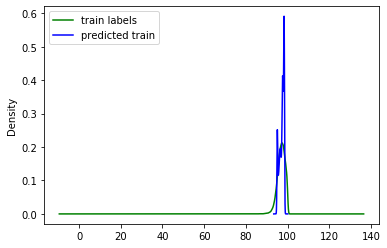

In [59]:
# labels_task3 = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_Heartrate','LABEL_SpO2']

trains_labels['LABEL_SpO2'].plot.kde(color='green',legend=True,label='train labels')
predictions_3['LABEL_SpO2'].plot.kde(color='blue',legend=True,label='predicted train')

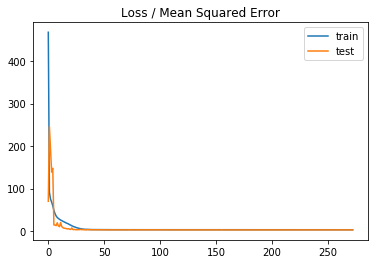

In [60]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# write to file

In [63]:
results = pd.DataFrame(columns=trains_labels.columns).fillna(0)
results[predictions_1.columns] = predictions_1
results[predictions_2.columns] = predictions_2
results[predictions_3.columns] = predictions_3

results['pid'] = fullTest.index

results.fillna(0,inplace=True)
#droping the index
results.reset_index(inplace=True,drop=True)

results.to_csv('./toSubmit-F/prediction.zip', index=False, float_format='%.3f', compression='zip')
results

,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate,pid
0,4.962665e-02,0.964478,0.999959,0.999932,0.999988,0.892084,0.016785,0.720460,0.996276,0.040600,0.650935,15.775916,79.999153,98.404076,82.665451,0
1,3.281946e-02,0.296179,0.504610,0.565306,0.625117,0.351879,0.358643,0.298018,0.185384,0.366033,0.295259,17.630539,79.175148,96.953094,84.057549,3
2,1.285356e-03,0.308249,0.520870,0.576698,0.646058,0.218340,0.077543,0.196450,0.126421,0.199568,0.326239,18.253086,73.622459,95.861542,67.078323,5
3,2.388120e-03,0.996520,0.999486,0.999663,0.999933,0.815925,0.996285,0.919072,0.996248,0.995949,0.727532,16.477419,87.231560,98.217728,88.681755,7
4,7.087665e-04,0.193673,0.662192,0.801080,0.818105,0.219341,0.321276,0.309741,0.691865,0.095273,0.281637,19.207298,88.118980,96.138718,84.440399,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12659,4.615258e-05,0.320400,0.747130,0.792102,0.873933,0.173313,0.009985,0.153117,0.106723,0.171091,0.297396,16.303459,70.429771,96.912506,69.909584,31647
12660,7.434177e-03,0.531175,0.738237,0.792169,0.771258,0.484587,0.351465,0.904075,0.098077,0.485637,0.427397,16.240093,80.261917,96.520966,84.648643,31649
12661,1.147740e-08,0.242964,0.943535,0.984845,0.993120,0.359793,0.009814,0.584926,0.052541,0.077609,0.351806,18.091932,75.191551,98.404076,81.862526,31651
12662,4.106078e-04,0.161213,0.739794,0.780186,0.818322,0.192073,0.322265,0.295749,0.389873,0.453649,0.293586,19.160038,89.935112,97.701996,97.258553,31652


In [64]:
# %load handout/score_submission.py
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

VITALS = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']
TESTS = ['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total',
         'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2',
         'LABEL_Bilirubin_direct', 'LABEL_EtCO2']


def get_score(df_true, df_submission):
    df_submission = df_submission.sort_values('pid')
    df_true = df_true.sort_values('pid')
    task1 = np.mean([metrics.roc_auc_score(df_true[entry], df_submission[entry]) for entry in TESTS])
    task2 = metrics.roc_auc_score(df_true['LABEL_Sepsis'], df_submission['LABEL_Sepsis'])
    task3 = np.mean([0.5 + 0.5 * np.maximum(0, metrics.r2_score(df_true[entry], df_submission[entry])) for entry in VITALS])
    score = np.mean([task1, task2, task3])
    print(task1, task2, task3)
    return score


filename = 'handout/sample.zip'
# df_submission = pd.read_csv("results.csv")
df_submission = results

# generate a baseline based on sample.zip
df_true = pd.read_csv(filename)
for label in TESTS + ['LABEL_Sepsis']:
    # round classification labels
    df_true[label] = np.around(df_true[label].values)

print('Score of sample.zip with itself as groundtruth', get_score(df_true, df_submission))

0.5010950626832302 0.5006514798448042 0.5
Score of sample.zip with itself as groundtruth 0.5005821808426781
